In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('dat.csv')

In [8]:
from sklearn.model_selection import train_test_split

In [23]:
X = df[['feature1', 'feature2']].values

In [24]:
y = df[['price']].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 23)

In [93]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [94]:
# Scale the datas'
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()

In [96]:
scaler.fit(X_train)

MinMaxScaler()

In [97]:
X_train = scaler.transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [100]:
model = Sequential()

In [101]:
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

#Final Output Layer
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss= 'mse')

In [102]:
model.fit(x= X_train, y= y_train, epochs= 250)

Epoch 1/250
22/22 [==============================] - 0s 5ms/step - loss: 257699.1094
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 257432.4375
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 257163.1094
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256873.4844
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256558.9062
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256218.7500
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255850.7656
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255454.0312
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255030.6719
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254574.7500
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254082.9531
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 1492.0414
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 1467.9576
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1436.6416
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1414.7183
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 1385.9976
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1358.6085
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 1330.2319
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1302.1442
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1273.6648
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1250.3817
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1224.4879
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 1199.57

22/22 [==============================] - 0s 1ms/step - loss: 26.3407
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 26.4130
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 26.3027
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 25.8714
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 25.7751
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 25.9730
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 25.8509
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 25.6737
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 25.5490
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 25.7191
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 25.1923
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 25.5485
Epoch 205/250
22/2

In [103]:
loss_df = pd.DataFrame(model.history.history)

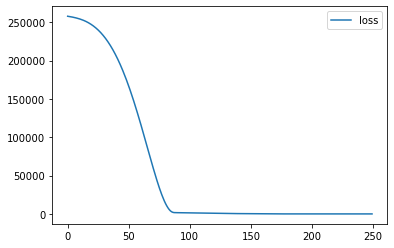

In [104]:
loss_df.plot();

#### Evaluate the model

In [105]:
model.evaluate(X_test, y_test, verbose = 0)

24.292409896850586

In [106]:
model.evaluate(X_train, y_train, verbose = 0)

26.355606079101562

In [107]:
# test prediction for price
test_preds = model.predict(X_test)

In [109]:
test_preds = pd.Series(test_preds.reshape(300,))

In [110]:
# creating a dataframe for y_test i.e true values
true_preds = pd.DataFrame(y_test, columns = ["True Values"])

In [111]:
true_preds = pd.concat([true_preds, test_preds], axis = 1)

In [112]:
true_preds.columns = ['True Values', 'Predicted Values']

In [113]:
true_preds

,True Values,Predicted Values
0,553.904629,550.404297
1,478.358238,484.422699
2,338.133842,336.737701
3,510.886612,507.640991
4,667.708565,665.704773
...,...,...
295,364.508421,360.831665
296,239.656264,239.281982
297,433.423135,436.992981
298,531.163418,532.801086


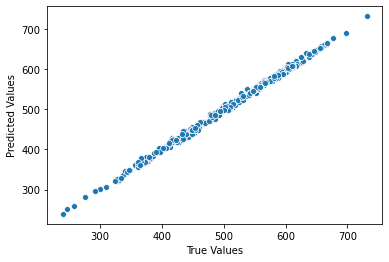

In [114]:
sns.scatterplot(x = "True Values", y = "Predicted Values", data = true_preds );

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [120]:
mean_absolute_error(true_preds["True Values"], true_preds["Predicted Values"])

4.062222404951257

In [122]:
mean_squared_error(true_preds["True Values"], true_preds["Predicted Values"])

24.29240772748206

In [126]:
new_shoes = [[998, 1000]]
new_shoes = scaler.transform(new_shoes)

In [129]:
model.predict(new_shoes)

array([[418.7969]], dtype=float32)

In [131]:
# Saving the model to use later
from tensorflow.keras.models import load_model

In [133]:
model.save('shoes_model.h5')

In [134]:
shoes_model = load_model('shoes_model.h5')

In [135]:
shoes_model.predict(new_shoes)

array([[418.7969]], dtype=float32)